**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: ---------------------------------------------------------
*   MATRÍCULA: ----------------------------------------------------


---

En esta actividad trabajarás con el archivo `cleaned_weather.csv`, un extracto del conjunto de datos meteorológicos a lo largo de todo el año 2020 en una estación del Instituto *Max Planck* (Alemania) disponible en Kaggle.

Los datos meteorológicos fueron registrados cada 10 minutos e incluyen los siguientes indicadores:

*   `timestamp`: Fecha y hora de la observación.
*   `p`: Presión atmosférica en milibares (mbar)
*   `T`: Temperatura del aire en grados Celsius (°C)
*   `Tpot`: Temperatura potencial en Kelvin (K)
*   `rh`: Humedad relativa en porcentaje (%)
*   `VPact`: Presión real de vapor en milibares (mbar)
*   `sh`: Humedad específica en gramos por kilogramo (g/kg)
*   `H2OC`: Concentración de vapor de agua en milimoles por mol (mmol/mol) de aire seco
*   `rho`: Densidad del aire en gramos por metro cúbico (g/m³)
*   `wv`: Velocidad del viento en metros por segundo (m/s)
*   `wd`: Dirección del viento en grados (°)
*   `rain`: Precipitación total en milímetros (mm)
*   `raining`: Duración de la lluvia en segundos (s)

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


In [1]:
# Importa las librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt

#Cargar dataset el Dataframe

df = pd.read_csv('cleaned_weather.csv')

#Determina la dimensionalidad del dataframe y obtén los identificadores de columnas.

fila=str(df.shape[0])
columnas=str(df.shape[1])

print (f"Dimensionalidad del DataFrame (filas, columnas): {fila},{columnas}")



Dimensionalidad del DataFrame (filas, columnas): 52696,13


1.	Descarga el archivo: `cleaned_weather.csv` y guarda, en un dataframe (`weather_df`), todos sus registros.
- Determina la dimensionalidad del dataframe y obtén los identificadores de columnas.
- Renombra las columnas para facilitar la interpretación de los indicadores en los ejercicios siguientes:
  - `medicion, presion_atmosferica, temperatura_celsius, temperatura_celsius, temperatura_kelvin, humedad_relativa, presion_vapor, humedad_especifica, concentracion_vapor, densidad_aire, velocidad_viento, direccion_viento, precipitacion_total, duracion_lluvia`
- Muestra los primeros y los últimos 5 registros.
- ¿Hay valores faltantes en el dataframe?





In [2]:
# Identificadores de las columnas

print (df.columns)
df.rename(columns={'timestamp':'medición', 'p':'presion_atomosferica', 'T':'temperatura', 'Tpot':'temperatura_potencial', 'rh':'humedad_relativa', 'VPact':'presion_vapor',
                   'sh':'humedad_especifica', 'H2OC':'concentracion_vapor',
                   'rho':'densidad_aire', 'wv':'velocidad_viento',
       'wd':'direccion_viento', 'rain':'precipitacion_total', 'raining':'duracion_lluvia'},inplace=True)
print(df.columns)

#muestra primeros y últimos 5 registros

print(df.head(5))
print(df.tail(5))

#datos faltantes

print(df.isnull().sum())

Index(['timestamp', 'p', 'T', 'Tpot', 'rh', 'VPact', 'sh', 'H2OC', 'rho', 'wv',
       'wd', 'rain', 'raining'],
      dtype='object')
Index(['medición', 'presion_atomosferica', 'temperatura',
       'temperatura_potencial', 'humedad_relativa', 'presion_vapor',
       'humedad_especifica', 'concentracion_vapor', 'densidad_aire',
       'velocidad_viento', 'direccion_viento', 'precipitacion_total',
       'duracion_lluvia'],
      dtype='object')
        medición  presion_atomosferica  temperatura  temperatura_potencial  \
0  01/01/20 0:10               1008.89         0.71                 273.18   
1  01/01/20 0:20               1008.76         0.75                 273.22   
2  01/01/20 0:30               1008.66         0.73                 273.21   
3  01/01/20 0:40               1008.64         0.37                 272.86   
4  01/01/20 0:50               1008.61         0.33                 272.82   

   humedad_relativa  presion_vapor  humedad_especifica  concentracion_vapor  \
0 

2. Determina el tipo de datos que tienen las columnas.
- Cambia la columna `medicion` a datetime.
- Obtén dos columnas adicionales separando `medicion` en `fecha` y `hora`.

In [3]:
#Determina el tipo de datos que tienen las columnas

print("\nTipos de datos por columna:")
print(df.dtypes)

#Cambia la columna medicion a datetime.
df["medición"]=pd.to_datetime(df["medición"], format='%d/%m/%y %H:%M')

#Obtén dos columnas adicionales separando medicion en fecha y hora

df["fecha"]=df["medición"].dt.date
df["hora"]=df["medición"].dt.time
print(df.dtypes)




Tipos de datos por columna:
medición                  object
presion_atomosferica     float64
temperatura              float64
temperatura_potencial    float64
humedad_relativa         float64
presion_vapor            float64
humedad_especifica       float64
concentracion_vapor      float64
densidad_aire            float64
velocidad_viento         float64
direccion_viento         float64
precipitacion_total      float64
duracion_lluvia            int64
dtype: object
medición                 datetime64[ns]
presion_atomosferica            float64
temperatura                     float64
temperatura_potencial           float64
humedad_relativa                float64
presion_vapor                   float64
humedad_especifica              float64
concentracion_vapor             float64
densidad_aire                   float64
velocidad_viento                float64
direccion_viento                float64
precipitacion_total             float64
duracion_lluvia                   int64
fecha   

3. Determina la cantidad de valores únicos de cada columna.
- La columna `medicion` tiene un valor menos que el número total de filas del dataframe, lo que indica que hay una fecha duplicada. Identifica cuál es.
- Comprueba si las demás columnas también contienen los mismos valores; si es así, elimina  uno de los registros duplicados.


In [4]:
#Determina la cantidad de valores únicos de cada columna

print(df.nunique())

#La columna medicion tiene un valor menos que el número total de filas del dataframe, lo que indica que hay una fecha duplicada. Identifica cuál es.


duplicados=df[df['medición'].duplicated(keep=False)]
print (duplicados)

#19043 2020-12-05 06:00:00                991.53        -1.57 

#elimina uno de los registros duplicados (por numero de ID)

df.drop(19043,inplace=True)

  

medición                 52695
presion_atomosferica      5052
temperatura               3680
temperatura_potencial     3836
humedad_relativa          5494
presion_vapor             2059
humedad_especifica        1337
concentracion_vapor       2087
densidad_aire            14826
velocidad_viento           977
direccion_viento          8099
precipitacion_total         42
duracion_lluvia             61
fecha                      367
hora                       144
dtype: int64
                 medición  presion_atomosferica  temperatura  \
19043 2020-05-12 06:00:00                991.53        -1.57   
19044 2020-05-12 06:00:00                991.53        -1.57   

       temperatura_potencial  humedad_relativa  presion_vapor  \
19043                 272.25              96.2           5.24   
19044                 272.25              96.2           5.24   

       humedad_especifica  concentracion_vapor  densidad_aire  \
19043                3.29                 5.28        1269.29   
190

4. Imprime nuevamente las cantidad de valores únicos por columna.
- ¿Por qué son 144 horas diferentes?
- La cantidad de combinaciones únicas de fecha y hora no coincide con el número total de mediciones. Aunque no haya valores NaN, esto no garantiza que no se hayan omitido registros. Identifica las fechas en las que faltan mediciones.
- Una vez concluido el análisis de mediciones faltantes, elimina todos los registros que no correspondan al año 2020 y la columna `medicion`.


In [5]:
#¿Por qué son 144 horas diferentes?
    #Intervalos de 10 minutos en un perido de 24 horas

print (df.nunique())
print (df["hora"].unique())

#Identifica las fechas en las que faltan mediciones.

rango_esperado = pd.date_range(start='2020-01-01 00:00:00', end='2021-01-01 00:00:00', freq='10T')
timestamps_faltantes = rango_esperado.difference(df['medición'])
print(f"\nSe encontraron {len(timestamps_faltantes)} mediciones faltantes.")
if not timestamps_faltantes.empty:
    print("Fecha(s) con mediciones faltantes:")
    fechas_faltantes = timestamps_faltantes.to_series().dt.date.unique()
    for fecha in fechas_faltantes:
        print(f"- {fecha}")
    print("\nTimestamps específicos faltantes:")
    print(timestamps_faltantes)

    #elimina todos los registros que no correspondan al año 2020 y la columna medicion

df=df[(df["medición"]>="2020-01-01")&(df["medición"]<="2020-12-31")]
df.drop(columns=["medición"],inplace=True)



medición                 52695
presion_atomosferica      5052
temperatura               3680
temperatura_potencial     3836
humedad_relativa          5494
presion_vapor             2059
humedad_especifica        1337
concentracion_vapor       2087
densidad_aire            14826
velocidad_viento           977
direccion_viento          8099
precipitacion_total         42
duracion_lluvia             61
fecha                      367
hora                       144
dtype: int64
[datetime.time(0, 10) datetime.time(0, 20) datetime.time(0, 30)
 datetime.time(0, 40) datetime.time(0, 50) datetime.time(1, 0)
 datetime.time(1, 10) datetime.time(1, 20) datetime.time(1, 30)
 datetime.time(1, 40) datetime.time(1, 50) datetime.time(2, 0)
 datetime.time(2, 10) datetime.time(2, 20) datetime.time(2, 30)
 datetime.time(2, 40) datetime.time(2, 50) datetime.time(3, 0)
 datetime.time(3, 10) datetime.time(3, 20) datetime.time(3, 30)
 datetime.time(3, 40) datetime.time(3, 50) datetime.time(4, 0)
 datetime.time

5. Obtén un dataframe `indicadores_diarios` que sólo almacene el mayor valor de las mediciones por fecha para responder:
- ¿Cuál fue la máxima precipitación y a qué fecha pertenece?
- ¿Cuáles fueron los tres días con las velocidades de viento más altas registradas?
- ¿Cuántos días rebasaron el 90% de humedad relativa y los 30° celsius?

In [14]:
#Data frame indicadores

indicadores_diarios = df.groupby("fecha").max().reset_index()
print("\nPrimeros 5 registros de indicadores diarios (valores máximos):")
print(indicadores_diarios.head())

#¿Cuál fue la máxima precipitación y a qué fecha pertenece?
#maxima_precipitacion=11.2fecha=2020-06-16

maxima_precipitacion=indicadores_diarios["precipitacion_total"].max()
fecha_maxprecipitacion=indicadores_diarios.loc[indicadores_diarios["precipitacion_total"].idxmax(),"fecha"]
print (f"maxima_precipitacion={maxima_precipitacion}fecha={fecha_maxprecipitacion}")

#¿Cuáles fueron los tres días con las velocidades de viento más altas registradas?

df_velocidadviento=df.sort_values(by="velocidad_viento",ascending=False)
print(df_velocidadviento["fecha"].head(3))


#5759    2020-02-10
#6758    2020-02-16
#5764    2020-02-10

#¿Cuántos días rebasaron el 90% de humedad relativa y los 30° celsius?
#220

indicadores_diarios["celsius"]=(indicadores_diarios["temperatura_potencial"]-32)*5/9
print(len(indicadores_diarios[(indicadores_diarios["humedad_relativa"]>90)&(indicadores_diarios["celsius"]>30)]))






Primeros 5 registros de indicadores diarios (valores máximos):
        fecha  presion_atomosferica  temperatura  temperatura_potencial  \
0  2020-01-01               1008.89         4.58                 277.27   
1  2020-01-02               1004.16         6.47                 279.72   
2  2020-01-03                998.45         8.17                 281.80   
3  2020-01-04               1003.47         6.61                 280.15   
4  2020-01-05               1009.07         4.43                 277.01   

   humedad_relativa  presion_vapor  humedad_especifica  concentracion_vapor  \
0              95.0           5.81                3.60                 5.77   
1              93.9           5.57                3.48                 5.58   
2              89.3           9.34                5.86                 9.39   
3              91.4           8.54                5.36                 8.58   
4              85.3           6.44                3.99                 6.40   

   densida

6. La función `describe()` resume múltiples estadísticas descriptivas. Utiliza esta función para explorar y responder las preguntas sobre las variables en el dataframe de `indicadores_diarios `:
- ¿Cuál es la desviación estándar de la concentración de vapor y qué indica?
- ¿Cuál es la mediana de la presión atmosférica y qué significa?
- ¿Cuál es el tercer cuartil de la duración de la lluvia y cómo se interpreta?

In [15]:
#¿Cuál es la desviación estándar de la concentración de vapor y qué indica?
#4.573578 indica que los valores se pueden desviar 4.5 pts sobre o debajo de la media

#¿Cuál es la mediana de la presión atmosférica y qué significa?
#993.300000 se refiere al valor que esta en medio de la relación de valores

#¿Cuál es el tercer cuartil de la duración de la lluvia y cómo se interpreta?
#600.000000 el 25% de las mediciones fueron mayores a 600

print(indicadores_diarios.describe())

       presion_atomosferica  temperatura  temperatura_potencial  \
count            366.000000   366.000000             366.000000   
mean             992.975902    15.339481             289.426858   
std                8.546377     7.857292               7.949415   
min              959.900000    -0.120000             273.460000   
25%              988.015000     8.840000             282.732500   
50%              993.300000    15.060000             289.160000   
75%              998.432500    21.695000             295.957500   
max             1020.070000    34.800000             309.130000   

       humedad_relativa  presion_vapor  humedad_especifica  \
count        366.000000      366.00000          366.000000   
mean          90.869044       11.40918            7.213852   
std            9.200402        4.50787            2.872833   
min           55.440000        3.32000            2.050000   
25%           85.400000        7.64750            4.832500   
50%           93.050000 

7.	Dibuja un histograma para cada una de las columnas de `indicadores_diarios`.

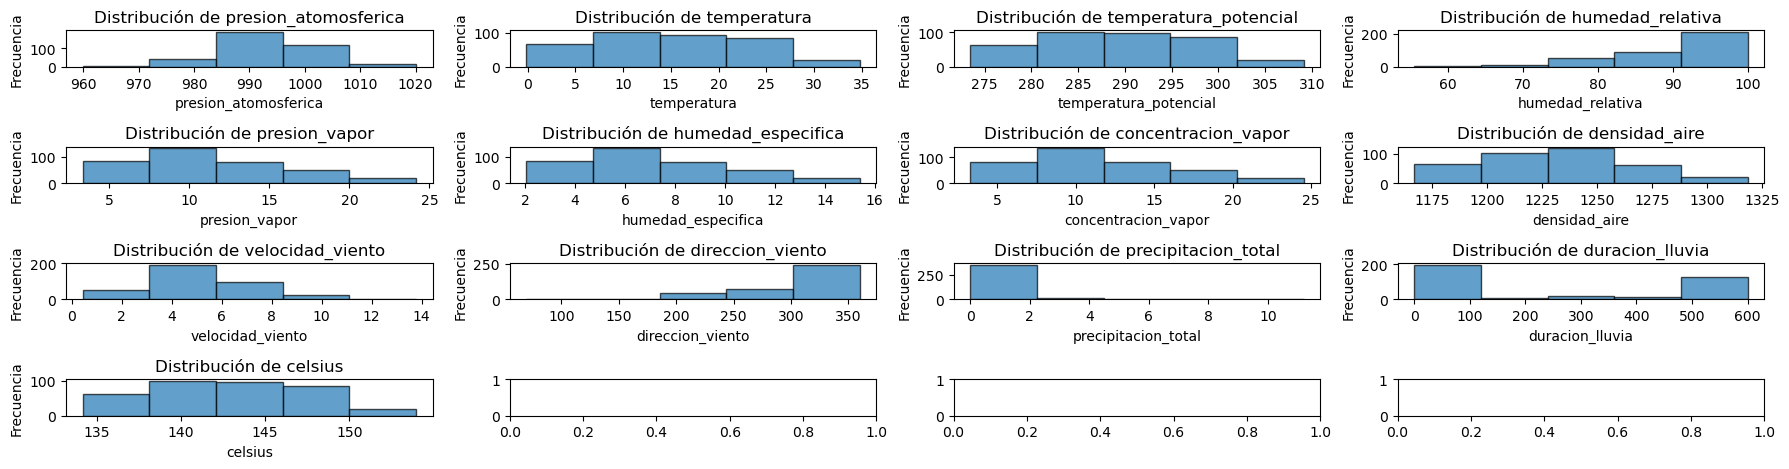

In [23]:
fechas_unicas=indicadores_diarios["fecha"].unique()
columnas=["presion_atomosferica","temperatura","temperatura_potencial",
          "humedad_relativa","presion_vapor","humedad_especifica","concentracion_vapor",
          "densidad_aire","velocidad_viento","direccion_viento","precipitacion_total",
          "duracion_lluvia","celsius"]

fig, axes = plt.subplots(4, 4, figsize=(18, 5))
axes = axes.flatten()
for i, col in enumerate (columnas):
    axes[i].hist(indicadores_diarios[col], bins=5, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



8. Utiliza el dataframe de indicadores diarios para crear un nuevo dataframe `indicadores_mensuales`. Para ello:
- Crea una nueva columna `mes` a partir de la fecha que se encuentra en el índice.
- Haciendo uso de `groupby()`, calcula los promedios mensuales y conserva únicamente las columnas `humedad_relativa`, `temperatura_celsius` y `velocidad_viento` en el nuevo dataframe.

In [27]:
#nuevo dataframe indicadores_mensuales
#Crea una nueva columna mes a partir de la fecha que se encuentra en el índice.
Haciendo uso de groupby(), calcula los promedios mensuales y conserva únicamente las columnas humedad_relativa, temperatura_celsius y velocidad_viento en el nuevo dataframe. 

indicadores_diarios["fecha"]=pd.to_datetime(indicadores_diarios["fecha"])
indicadores_diarios["mes"]=indicadores_diarios["fecha"].dt.strftime("%B")

indicadores_mensuales=indicadores_diarios.groupby("mes").agg(
    humedad_relativa=("humedad_relativa","mean"),
    temperatura_celsius=("celsius","mean"),
    velocidad_viento=("velocidad_viento","mean")).reset_index()

print (indicadores_mensuales)



          mes  humedad_relativa  temperatura_celsius  velocidad_viento
0       April         80.938667           143.810370          4.997000
1      August         92.002581           149.100717          5.040323
2    December         97.304516           137.936559          4.682258
3    February         85.719655           139.710728          7.489655
4     January         89.776129           137.990323          5.031935
5        July         85.959355           148.030466          4.830323
6        June         94.256000           146.985370          5.296667
7       March         85.372903           139.813082          6.421290
8         May         87.464839           143.839068          4.865806
9    November         96.983333           140.010370          4.399000
10    October         96.950645           142.467025          5.675484
11  September         97.570000           146.439074          4.153333


9. Construye el mismo dataframe mensual, pero esta vez utilizando la función `pivot_table()`.
- Añade la columna `indice_calor` usando la fórmula de Thom (*Temperature - Humidity Index*, TDI):
> `temperatura_celsius + 0.33 x humedad_relativa - 0.7 x velocidad_viento - 4`

In [32]:
#función pivot_table()
#Añade la columna indice_calor usando la fórmula de Thom (Temperature - Humidity Index, TDI)

indicadores_mensuales=pd.pivot_table(indicadores_diarios,index="mes",values=["celsius","humedad_relativa",
                                                                             "velocidad_viento"],
                                     aggfunc="mean").reset_index()
indicadores_mensuales["indice_calor"]=indicadores_mensuales["celsius"]+0.33*indicadores_mensuales["humedad_relativa"]-0.7*indicadores_mensuales["velocidad_viento"]-4

print(indicadores_mensuales)
                                                                  



          mes     celsius  humedad_relativa  velocidad_viento  indice_calor
0       April  143.810370         80.938667          4.997000    163.022230
1      August  149.100717         92.002581          5.040323    171.933343
2    December  137.936559         97.304516          4.682258    162.769469
3    February  139.710728         85.719655          7.489655    158.755456
4     January  137.990323         89.776129          5.031935    160.094090
5        July  148.030466         85.959355          4.830323    169.015827
6        June  146.985370         94.256000          5.296667    170.382184
7       March  139.813082         85.372903          6.421290    159.491237
8         May  143.839068         87.464839          4.865806    165.296400
9    November  140.010370         96.983333          4.399000    164.935570
10    October  142.467025         96.950645          5.675484    166.487899
11  September  146.439074         97.570000          4.153333    171.729841


10. Recuerda que de las cuatro funciones estudiadas para manipular la estructura del dataframe:
- `melt/pivot` hacen las transformaciones de manera controlada, es decir puedes
definir por medio de sus parámetros qué variables quedarán como índices, columnas y valores.
- `stack/unstack` la conversión se aplica siempre sobre los niveles inferiores de index/columns.
- Convierte el dataframe del ejercicio anterior a formato largo usando: `melt()` y `stack()` y comenta las diferencias.

In [37]:
#Convierte el dataframe del ejercicio anterior a formato largo usando: melt() y stack() y comenta las diferencias.

#melt

print(pd.melt(indicadores_mensuales,id_vars=["mes"],value_vars=["celsius","humedad_relativa"]))

#stack

print(indicadores_mensuales.stack())

#Con melt se muestran los resultados en forma vertical como una transposición de datos, stack genera una especie
#de niveles internos o multinivel



          mes          variable       value
0       April           celsius  143.810370
1      August           celsius  149.100717
2    December           celsius  137.936559
3    February           celsius  139.710728
4     January           celsius  137.990323
5        July           celsius  148.030466
6        June           celsius  146.985370
7       March           celsius  139.813082
8         May           celsius  143.839068
9    November           celsius  140.010370
10    October           celsius  142.467025
11  September           celsius  146.439074
12      April  humedad_relativa   80.938667
13     August  humedad_relativa   92.002581
14   December  humedad_relativa   97.304516
15   February  humedad_relativa   85.719655
16    January  humedad_relativa   89.776129
17       July  humedad_relativa   85.959355
18       June  humedad_relativa   94.256000
19      March  humedad_relativa   85.372903
20        May  humedad_relativa   87.464839
21   November  humedad_relativa 